# Comparison between DBlue and DDR datasets

Load libraries, define constants

In [1]:
import atddm
import pandas as pd
import numpy as np
from datetime import time
import matplotlib.pyplot as plt

In [2]:
CODES = ['EGLL', 'XXXX']
INTERVAL = 10
COLORS = ['b', 'g']

In [3]:
dd = atddm.load(subset=CODES)

Binning DBlue data every `INTERVAL` minutes, filter between 15-jun-2010 and 15-sep-2010. This goes into the `EGLL` series.

Binning DDR data. This goes into the `XXXX` series.

In [ ]:
m3_bin = {}
begdt = pd.Timestamp(amata.constants.BEGDT)
enddt = pd.Timestamp(amata.constants.ENDDT)
m3_bin['EGLL'] = amata.binarrivals(dd['EGLL'].M3_FL240, interval=INTERVAL)[begdt:enddt]
begdt = pd.Timestamp('2016-09-26 00:00:00')
enddt = pd.Timestamp('2016-10-09 23:59:59')
m3_bin['XXXX'] = amata.binarrivals(dd['XXXX'].M3_FL240, interval=INTERVAL)[begdt:enddt]

Computing daily averages per slots of `INTERVAL` minutes.

In [5]:
daily = {}
for code in CODES:
    daily[code] = amata.daily_avg(m3_bin[code])

Drawing a side-by-side plot.

In [10]:
f, axes = plt.subplots(1,2, sharey=True, figsize=(16,9))
for ax, code, c in zip(axes, CODES, COLORS):
    df = daily[code]
    ax.plot(range(len(df)), df.mu, color=c)
    ax.fill_between(range(len(df)), df.mu - 1.96*df.stermn, df.mu + 1.96*df.stermn, color=c, alpha=.25)
    freq = df.index.freq.delta.components.minutes
    times = [time(i,j).strftime('%H:%M') for i in range(24) for j in range(0,60,freq)]
    xticks = [(2+3*i)*60//freq for i in range(8)]
    ax.set_ylim(-1,17)
    ax.set_xlim(0,24*60//freq)
    ax.set_xticks(xticks)
    ax.set_xticklabels([times[i] for i in xticks])
    ax.set_ylabel('Avg TS - {:s}'.format(code))

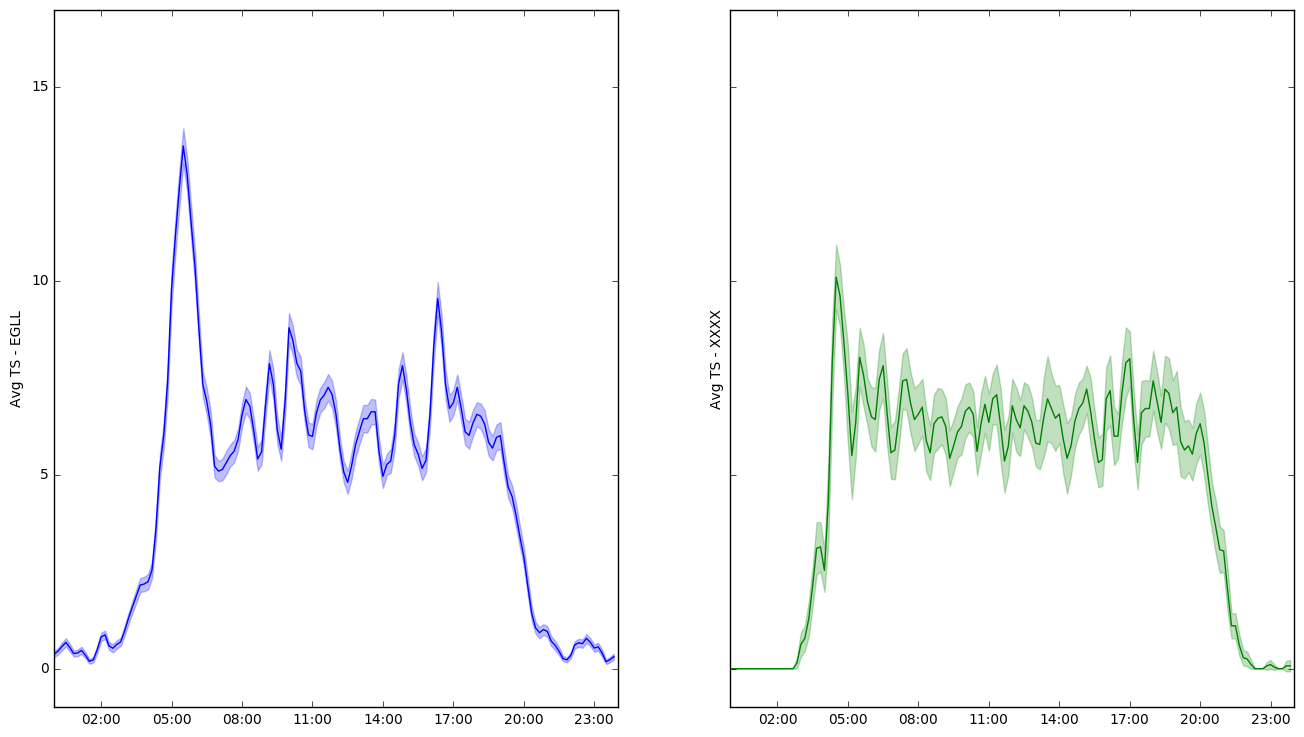

In [11]:
plt.show()

**Conclusion:** although the two figures resemble each other, there is evidence that the dataset are sampled from different population. In particular, the `EGLL` series shows more extreme peaks and less frequent oscillations around the nominal capacity. It is not clear whether this is due to structural difference in the ATM processes - the samples are taken 6 years apart - or because the older dataset was not extracted in a correct way.